# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Adnan Syawal Adilaha Sadikin
- **Email:** m180d4ky2011@bangkit.academy
- **ID Dicoding:** adnan_syawal

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana hubungan antara berat barang dengan harga ongkos kirim?

- Pertanyaan 2 : Bagaimana Persentase Tipe Payment yang Digunakan Customer?

- Pertanyaan 3 : Bagaimana Proporsi Penilaian Customer?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [ ]:
customer_df = pd.read_csv("/content/olist_customers_dataset.csv")
customer_df.head()
order_items_df = pd.read_csv("/content/olist_order_items_dataset.csv")
order_items_df.head()
order_payments_df = pd.read_csv("/content/olist_order_payments_dataset.csv")
order_payments_df.head()
order_review_df = pd.read_csv("/content/olist_order_reviews_dataset.csv")
order_review_df.head()
orders_df = pd.read_csv("/content/olist_orders_dataset.csv")
orders_df.head()
products_df = pd.read_csv("/content/olist_products_dataset.csv")
products_df.head()
prodnames_df = pd.read_csv("/content/product_category_name_translation.csv")
prodnames_df.head()
sellers_df = pd.read_csv("/content/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [ ]:
#memeriksa tipe data per kolom
customer_df.info()

#memeriksa data duplikat
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

#memeriksa tipe data per kolom
order_items_df.info()

#menampilkan statistika deskriptif
order_items_df.describe()

#memeriksa data duplikat
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

#memeriksa tipe data per kolom
order_payments_df.info()

#menampilkan statistika deskriptif
order_payments_df.describe()

#memeriksa data duplikat
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())

#memeriksa tipe data per kolom
order_review_df.info()

#memeriksa missing values tiap kolom
order_review_df.isna().sum()

#memeriksa data duplikat
print("Jumlah duplikasi: ",order_review_df.duplicated().sum())

#memeriksa tipe data per kolom
orders_df.info()

#memeriksa missing values tiap kolom
orders_df.isna().sum()

#memeriksa data duplikat
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

#memeriksa tipe data per kolom
products_df.info()

#memeriksa missing values tiap kolom
products_df.isna().sum()

#memeriksa data duplikat
print("Jumlah duplikasi: ",products_df.duplicated().sum())

#memeriksa tipe data per kolom
prodnames_df.info()

#memeriksa data duplikat
print("Jumlah duplikasi: ",prodnames_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  1

### Cleaning Data

In [ ]:
# @title DataFrame Customer
#menghapus kolom yang tidak diperlukan
customer_df.drop(['customer_unique_id','customer_zip_code_prefix'], axis=1, inplace=True)
customer_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [ ]:
# @title DataFrame order_items
#menghapus kolom yang tidak diperlukan
order_items_df.drop(['order_item_id','seller_id','shipping_limit_date'], axis=1, inplace=True)
order_items_df.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


In [ ]:
# @title DataFrame order_payments
#menghapus kolom yang tidak diperlukan
order_payments_df.drop(['payment_sequential','payment_installments'], axis=1, inplace=True)
order_payments_df.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


In [ ]:
# @title DataFrame order_review
#menghapus kolom yang tidak diperlukan
order_review_df.drop(['review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'], axis=1, inplace=True)
order_review_df.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [ ]:
# @title DataFrame orders
#menghapus kolom yang tidak diperlukan
orders_df.drop(orders_df.columns.difference(['order_id','customer_id',"order_status"]), axis=1, inplace=True)
orders_df.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [ ]:
# @title DataFrame Producst
#menghapus kolom yang tidak diperlukan
products_df.drop(products_df.columns.difference(['product_id','product_category_name','product_weight_g']), axis=1, inplace=True)
products_df.head()

,product_id,product_category_name,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0


In [ ]:
#memeriksa missing values tiap kolom
products_df.isna().sum()

product_id                 0
product_category_name    610
product_weight_g           2
dtype: int64

In [ ]:
#memeriksa missing values tiap kolom
orders_df.isna().sum()

order_id        0
customer_id     0
order_status    0
dtype: int64

In [ ]:
#mengganti missing value dengan "not defined"
products_df.product_category_name.fillna(value="Not defined", inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#menggabungkan orders dan customer
customer_orders_df = pd.merge(
   left=orders_df,
   right=customer_df,
   how="left",
   left_on="customer_id",
   right_on="customer_id"
)
customer_orders_df.head()

,order_id,customer_id,order_status,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,santo andre,SP


In [ ]:
print("Jumlah duplikasi: ",customer_orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customer_orders_df.isna().sum()

order_id          0
customer_id       0
order_status      0
customer_city     0
customer_state    0
dtype: int64

In [ ]:
#menampilkan jumlah customer berdasarkan kota dan state
customer_orders_df.groupby(by=["customer_state","customer_city"]).agg({
    "order_id":"count"
})

order_id
customer_state customer_city                    
AC             brasileia                       1
               cruzeiro do sul                 3
               epitaciolandia                  1
               manoel urbano                   1
               porto acre                      1
...                                          ...
TO             silvanopolis                    1
               sitio novo do tocantins         2
               taguatinga                      3
               tocantinopolis                  7
               xambioa                         3

[4310 rows x 1 columns]

### Explore Products and ProdNames

In [ ]:
#menggabungkan orders dan customer
product_names_df = pd.merge(
   left=products_df,
   right=prodnames_df,
   how="left",
   left_on="product_category_name",
   right_on="product_category_name"
)
product_names_df.head()

,product_id,product_category_name,product_weight_g,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,housewares


In [ ]:
print("Jumlah duplikasi: ",product_names_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
product_names_df.isna().sum()

product_id                         0
product_category_name              0
product_weight_g                   2
product_category_name_english    623
dtype: int64

In [ ]:
product_names_df['product_category_name_english'].fillna(value="Not defined", inplace=True)

### Exploratory order_items and order_payments

In [ ]:
#menggabungkan order_items dan order_payments
products_payments_df = pd.merge(
   left=order_items_df,
   right=order_payments_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
products_payments_df.head()

,order_id,product_id,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04


In [ ]:
print("Jumlah duplikasi: ",products_payments_df.duplicated().sum())

Jumlah duplikasi:  11217


In [ ]:
products_payments_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", products_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
products_payments_df.isna().sum()

order_id         0
product_id       0
price            0
freight_value    0
payment_type     1
payment_value    1
dtype: int64

In [ ]:
#payment_type berupa kategorik, jadi diisi dengan modus
products_payments_df.payment_type.value_counts()
products_payments_df['payment_type'].fillna(value="credit_card", inplace=True) #isi dengan modus
products_payments_df.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    1
dtype: int64

In [ ]:
#payment_value berupa numerik, jadi diisi dengan mean
products_payments_df.payment_value.mean()
products_payments_df['payment_value'].fillna(value=157.2843, inplace=True) #isi dengan mean
products_payments_df.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    0
dtype: int64

### Exploratory product_payments & order_review

In [ ]:
#menggabungkan product_payments dan product_review
selling_df = pd.merge(
   left=products_payments_df,
   right=order_review_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
selling_df.head()

,order_id,product_id,price,freight_value,payment_type,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04,5.0


In [ ]:
print("Jumlah duplikasi: ", selling_df.duplicated().sum())

Jumlah duplikasi:  390


In [ ]:
selling_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", selling_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
selling_df.isna().sum()

order_id           0
product_id         0
price              0
freight_value      0
payment_type       0
payment_value      0
review_score     828
dtype: int64

In [ ]:
#review_score berupa numerik, jadi diisi dengan mean
selling_df.review_score.mean()
selling_df['review_score'].fillna(value=4.073, inplace=True) #isi dengan mean
selling_df.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    0
review_score     0
dtype: int64

###Exploratory customer_orders & selling

In [ ]:
#menggabungkan orders_customer dan selling
all_df = pd.merge(
   left=customer_orders_df,
   right=selling_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,customer_city,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0


In [ ]:
#menggabungkan products_name dan selling
alldata_df = pd.merge(
   left=all_df,
   right=product_names_df,
   how="left",
   left_on="product_id",
   right_on="product_id"
)
alldata_df.head()

,order_id,customer_id,order_status,customer_city,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score,product_category_name,product_weight_g,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0,utilidades_domesticas,500.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0,utilidades_domesticas,500.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0,utilidades_domesticas,500.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0,perfumaria,400.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0,automotivo,420.0,auto


In [ ]:
print("Jumlah duplikasi: ", alldata_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
alldata_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
customer_city                      0
customer_state                     0
product_id                       775
price                            775
freight_value                    775
payment_type                     775
payment_value                    775
review_score                     775
product_category_name            775
product_weight_g                 792
product_category_name_english    775
dtype: int64

In [ ]:
alldata_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", alldata_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
alldata_df.to_csv("all_data_ecommerce.csv", index=False)


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara berat barang dengan harga ongkos kirim?

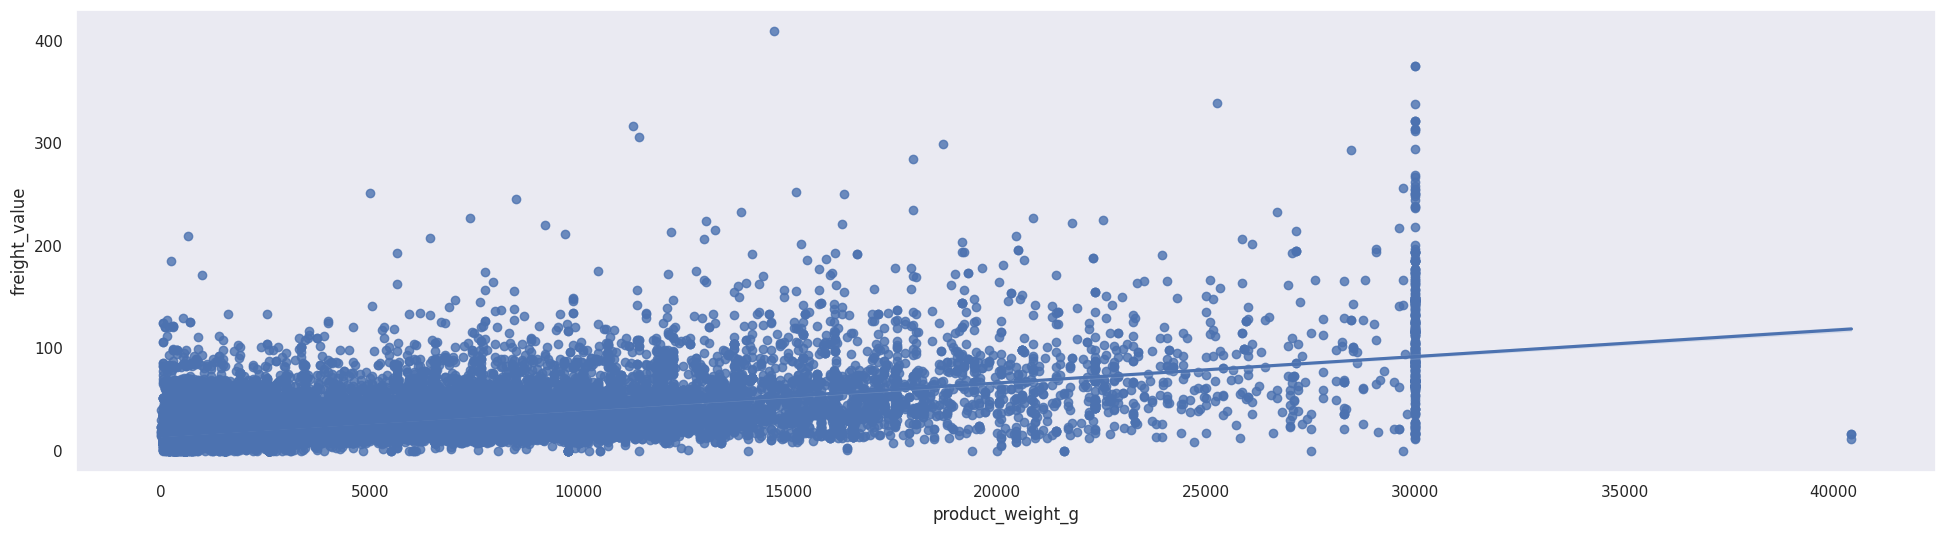

In [ ]:
#melihat korelasi antara price dan freight_value
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6)) #bikin kanvasnya dulu
colors = ["#BBF90F", "#E6E6FA", "#E6E6FA", "#E6E6FA", "#E6E6FA"]

sns.regplot(x=alldata_df['product_weight_g'], y=alldata_df['freight_value'])
plt.show()

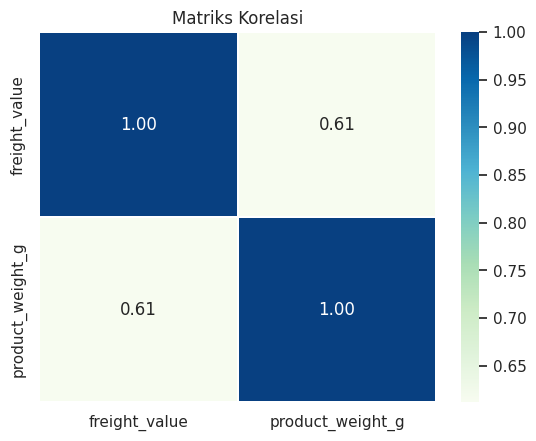

In [ ]:
selected_columns = alldata_df[['freight_value','product_weight_g']]
selected_columns.head(15)
correlation_mat = selected_columns.corr()
sns.heatmap(correlation_mat, annot=True, cmap='GnBu', fmt='.2f', linewidths=0.1)
plt.title('Matriks Korelasi')
plt.show()

Berdasarkan hasil analisis scatterplot dan matriks korelasi antara product_weight_g dengan freight_value, dapat dilihat bahwa kedua variabel memiliki korelasi yang kuat. Hal ini terbukti dengan nilai korelasi yang ditunjukkan oleh matriks korelasi antara keduanya yaitu sebesar 61%, sehingga korelasi linier antara kedua variabel adalah kuat dan saling bersesuaian.

### Pertanyaan 2: Bagaimana Persentase Tipe Payment yang Digunakan Customer?


In [ ]:
#menentukan persentase tipe payment yang digunakan
count_payment_type_df = alldata_df.groupby("payment_type").order_id.count().sort_values(ascending=False).reset_index()
count_payment_type_df.head(15)

,payment_type,order_id
0,credit_card,79423
1,boleto,20343
2,voucher,5284
3,debit_card,1585


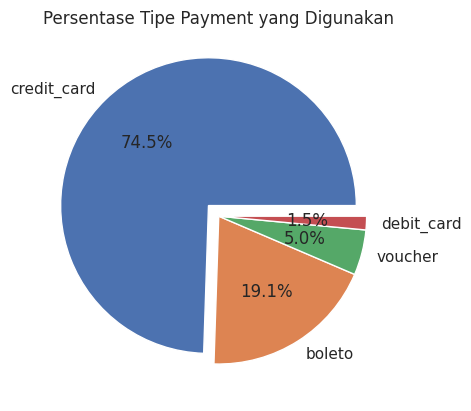

In [ ]:
#membuat diagram lingkaran proporsi penggunaan tipe payment
payment_count = alldata_df['payment_type'].value_counts()
colors = sns.color_palette("deep", len(payment_count))
explode = (0.1, 0, 0, 0)

plt.pie(
    x=payment_count,
    labels=payment_count.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title('Persentase Tipe Payment yang Digunakan')

plt.show()

### Pertanyaan 3: Bagaimana Proporsi Penilaian Customer?

In [ ]:
#menentukan proporsi penilaian customer
sum_order_items_df = alldata_df.groupby("review_score").order_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,review_score,order_id
0,5.000,60734
1,4.000,20326
2,1.000,12371
3,3.000,8839
4,2.000,3537
5,4.073,828


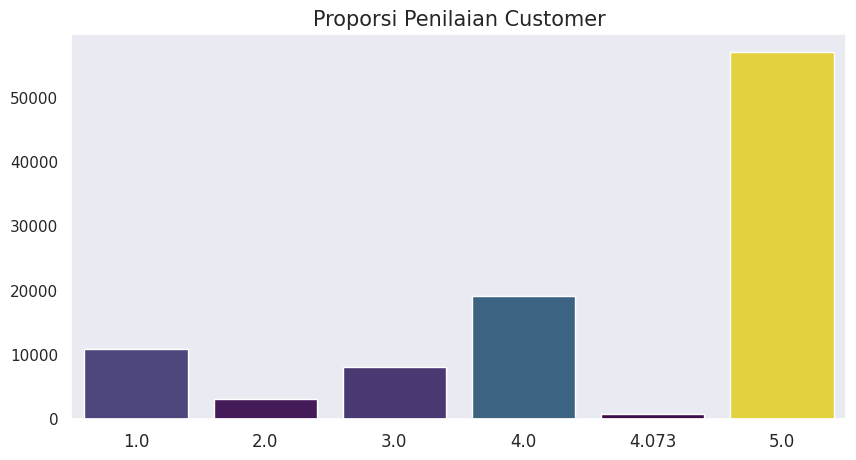

In [ ]:
#membuat diagram batang untuk proporsi penilaian
bycategory_df = alldata_df.groupby(by=["review_score"]).order_id.nunique().reset_index()
bycategory_df.rename(columns={
    "order_id": "cust_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cust_count",
    x="review_score",
    hue="cust_count",
    data=bycategory_df.sort_values(by="cust_count", ascending=False),
    palette="viridis", legend=False
)
plt.title("Proporsi Penilaian Customer", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : terdapat korelasi yang kuat antara  korelasi antara product_weight_g dengan freight_value sebesar 61%. Sehingga memungkinkan bahwa berat barang mempengaruhi biaya pengiriman.
- Conclution pertanyaan 2 : Kartu Kredit menjadi metode pembayaran yang paling banyak digunakan customer dengan persentase sebesar 74.5%.
- Conclution pertanyaan 3 : Proporsi penilaian customer didominasi dengan customer yang sangat puas dengan pembelian yang dapat dilihat dari pemberian nilai "5" menjadi proporsi terbesar diantara nilai yang lain.